# Table of Contents
1. [imports](#imports)
2. [find all ways](#find-all-ways)
3. [delete ways with repetitive points](#delete-ways-with-repetitive-points)
4. [find number of ways without repetitive points](#find-number-of-ways-without-repetitive-points)
5. [main function](#main-function)

# imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

# find all ways

In [24]:
def find_all_ways(N: int):
    '''
        get N that is the number of steps and return a list of size 2^N
        that each element of it is a way to go with that nuber of step
    '''
    
    all_ways = [ [(0, 0)] ]
    
    # n can't be 0 because in that case don't want to do any thing and just return [ [[0, 0]] ]
    # ---------------------------------------------------------------------------------------------
    for n in range(1, N+1):
        all_new_ways = []
        
        for i in range(len(all_ways)):
            old_way = all_ways[i]
            
            # we make 4 way from each way
            # ---------------------------
            new_way_to_right = old_way.copy()
            new_way_to_left  = old_way.copy()
            new_way_to_up    = old_way.copy()
            new_way_to_down  = old_way.copy()
            
            # way[-1] means the last point of the way
            # ---------------------------------------
            new_way_to_right.append(tuple(np.array(old_way[-1]) + np.array([1, 0])))
            new_way_to_left .append(tuple(np.array(old_way[-1]) + np.array([-1, 0])))
            new_way_to_up   .append(tuple(np.array(old_way[-1]) + np.array([0, 1])))
            new_way_to_down .append(tuple(np.array(old_way[-1]) + np.array([0, -1])))
                        
            # add new_ways
            # ------------
            all_new_ways.append(new_way_to_right)
            all_new_ways.append(new_way_to_left)        
            all_new_ways.append(new_way_to_up)        
            all_new_ways.append(new_way_to_down)

        # replace the old ways with new ones
        # ------------------------------
        all_ways = all_new_ways
        
    return all_ways

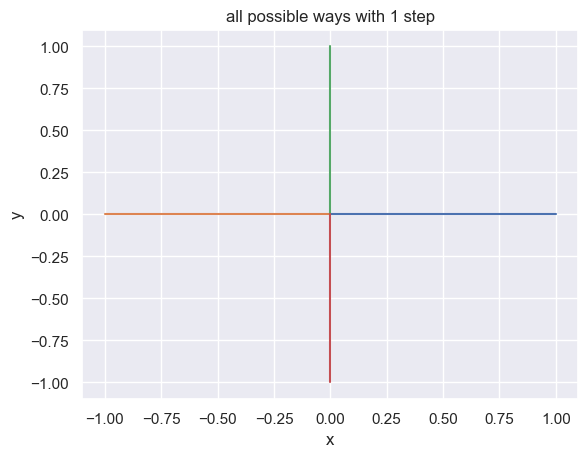

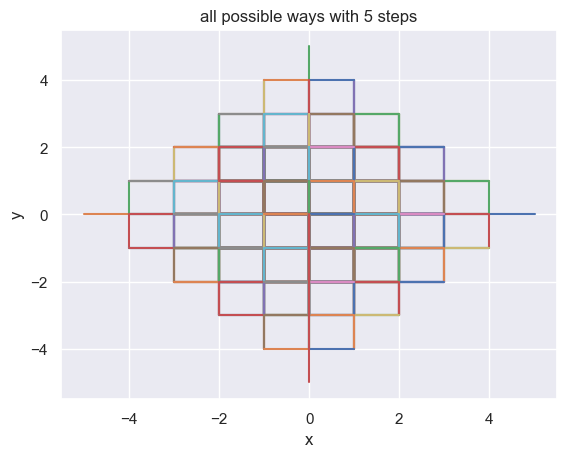

In [25]:
# test find_all_ways function --------------------

for way in np.array(find_all_ways(1)):
    plt.plot(way[:, 0], way[:, 1])
    
plt.title("all possible ways with 1 step")
plt.xlabel("x")
plt.ylabel("y")

plt.figure()

for way in np.array(find_all_ways(5)):
    plt.plot(way[:, 0], way[:, 1])
    
plt.title("all possible ways with 5 steps")
plt.xlabel("x")
plt.ylabel("y");

# delete ways with repetitive points

In [26]:
def delete_ways_with_repetitive_points(all_ways: np.ndarray) -> np.ndarray:
    '''
        convert a way that is a list of tuples to a set and if there are a repetitive element it will be deleted automatically
        and we can detect it using len function.
        we delete those ways from orginal list of ways and it will cantain the ways without repetitive points
    '''
    
    indexes_of_the_ways_with_repetitive_points = []
    
    for i in range(len(all_ways)):
        if len(set(all_ways[i])) != len(all_ways[i]):
            indexes_of_the_ways_with_repetitive_points.append(i)
            
    # use reversed function to delete from the last index to avoid problems with index changing
    # -----------------------------------------------------------------------------------------
    for i in reversed(indexes_of_the_ways_with_repetitive_points):
        del all_ways[i]

In [27]:
# test delete_ways_with_repetitive_points function --------------------------

print("for N=2:\n")

all_ways = find_all_ways(2)
print("all ways:\n", all_ways)

delete_ways_with_repetitive_points(all_ways)
print("\nways with nonrepetitive points:\n", all_ways)

for N=2:

all ways:
 [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (0, 0)], [(0, 0), (1, 0), (1, 1)], [(0, 0), (1, 0), (1, -1)], [(0, 0), (-1, 0), (0, 0)], [(0, 0), (-1, 0), (-2, 0)], [(0, 0), (-1, 0), (-1, 1)], [(0, 0), (-1, 0), (-1, -1)], [(0, 0), (0, 1), (1, 1)], [(0, 0), (0, 1), (-1, 1)], [(0, 0), (0, 1), (0, 2)], [(0, 0), (0, 1), (0, 0)], [(0, 0), (0, -1), (1, -1)], [(0, 0), (0, -1), (-1, -1)], [(0, 0), (0, -1), (0, 0)], [(0, 0), (0, -1), (0, -2)]]

ways with nonrepetitive points:
 [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)], [(0, 0), (1, 0), (1, -1)], [(0, 0), (-1, 0), (-2, 0)], [(0, 0), (-1, 0), (-1, 1)], [(0, 0), (-1, 0), (-1, -1)], [(0, 0), (0, 1), (1, 1)], [(0, 0), (0, 1), (-1, 1)], [(0, 0), (0, 1), (0, 2)], [(0, 0), (0, -1), (1, -1)], [(0, 0), (0, -1), (-1, -1)], [(0, 0), (0, -1), (0, -2)]]


# find number of ways without repetitive points

In [28]:
def find_number_of_ways_without_repetitive_points(N_max: int) -> np.ndarray:  
    # number of all ways in each N (N=0, 1, 2, 3, ..., N_max)
    # -------------------------------------------------------
    number_of_all_ways = np.zeros(N_max+1)    
    
    for n in range(N_max+1):
        all_ways = find_all_ways(n)
        delete_ways_with_repetitive_points(all_ways)
        
        number_of_all_ways[n] = len(all_ways)
        
    return number_of_all_ways

# main function

In [29]:
def main():
    N_max = int(input("N_max:"))
    
    number_of_ways_without_repetitive_points = find_number_of_ways_without_repetitive_points(N_max)
    number_of_all_ways = 4**np.arange(N_max+1)
    
    plt.plot(range(N_max+1), number_of_ways_without_repetitive_points)
    plt.title("number of ways without repetitive points as a function of N")
    plt.ylabel("number of ways without repetitive points")
    plt.xlabel("N")
    
    plt.figure()
    plt.plot(range(N_max+1), number_of_ways_without_repetitive_points/number_of_all_ways)
    plt.title(r"$\frac{number\:of\:ways\:without\:repetitive\:points}{number\:of\:all\:ways}$ as a function of N")
    plt.ylabel(r"$\frac{number\:of\:ways\:without\:repetitive\:points}{number\:of\:all\:ways}$")
    plt.xlabel("N")

N_max: 10


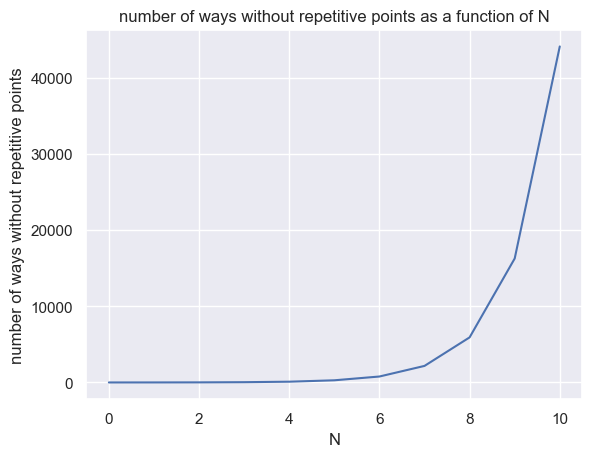

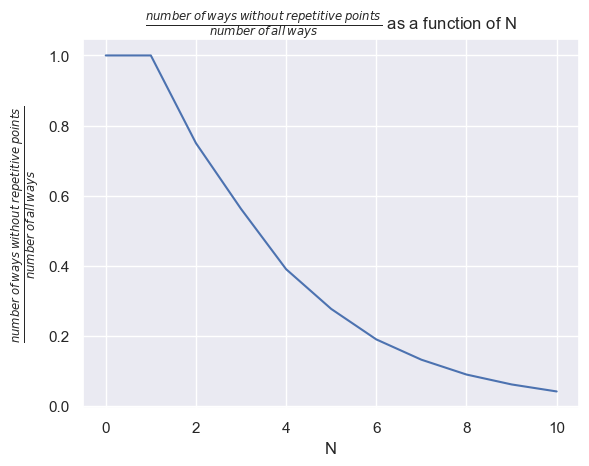

In [30]:
main()